Loan Approval Prediction using Machine Learning

In [1]:
#importing relevant packages

import numpy as np
import pandas as pd

#import packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import pickle

In [2]:
#loading the dataset into a dataframe
data = pd.read_csv("Loan_approval.csv")

In [3]:
#display first few rows of the dataframe
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
#display the number of rows and columns

data.shape

(58645, 13)

In [5]:
# Get the basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
#Check the summary statistics of the numerical values in the data
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
# Check for missing values
data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
# Check for duplicates 
data.duplicated().sum()


0

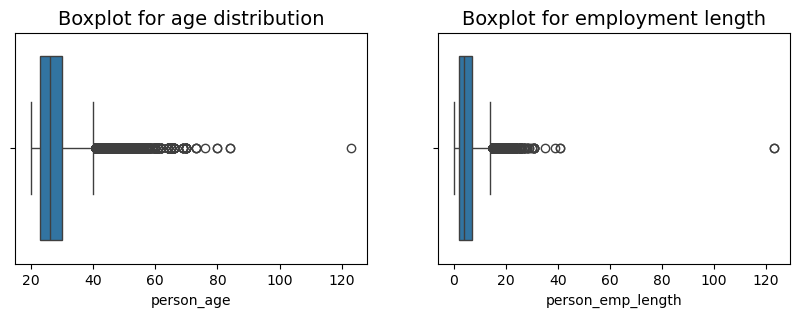

In [9]:
# plot a boxplot for age and person_emp_length to identify outliers
fig, ax= plt.subplots(1,2, figsize=(10,3))
sns.boxplot(data=data, x='person_age', orient= 'h', ax=ax[0])
ax[0].set_title('Boxplot for age distribution', fontsize='14')
sns.boxplot(data=data, x='person_emp_length', ax=ax[1])
ax[1].set_title('Boxplot for employment length', fontsize='14')

plt.show()

Above Box plot for age and person_emp_length has one row each with value 123 which are outliers

In [10]:
# removing rows with person_age=123 and person_emp_length=123
df1=data[(data['person_age']!= 123) & (data['person_emp_length']!= 123)]

In [11]:
df1.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58642.000000,58642.000000,5.864200e+04,58642.000000,58642.000000,58642.000000,58642.000000,58642.000000,58642.000000
mean,29321.152468,27.549333,6.404453e+04,4.696941,9217.146448,10.677770,0.159235,5.813649,0.142372
std,16929.497527,6.020420,3.792822e+04,3.899139,5563.380070,3.034695,0.091690,4.029261,0.349435
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14660.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29320.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43981.750000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,84.000000,1.900000e+06,41.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [12]:
#saving the cleaned file to csv for further data visualization in tableau

df1.to_csv('data_loan_cleaned.csv', index=False)

In [13]:
#loading the cleaned dataset to variable data for further modeling
data= pd.read_csv('data_loan_cleaned.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58642 entries, 0 to 58641
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58642 non-null  int64  
 1   person_age                  58642 non-null  int64  
 2   person_income               58642 non-null  int64  
 3   person_home_ownership       58642 non-null  object 
 4   person_emp_length           58642 non-null  float64
 5   loan_intent                 58642 non-null  object 
 6   loan_grade                  58642 non-null  object 
 7   loan_amnt                   58642 non-null  int64  
 8   loan_int_rate               58642 non-null  float64
 9   loan_percent_income         58642 non-null  float64
 10  cb_person_default_on_file   58642 non-null  object 
 11  cb_person_cred_hist_length  58642 non-null  int64  
 12  loan_status                 58642 non-null  int64  
dtypes: float64(3), int64(6), object

In [15]:
# Check the class balance for the target variable 'loan_status'
data['loan_status'].value_counts(normalize= True)

loan_status
0    0.857628
1    0.142372
Name: proportion, dtype: float64

The class balance here is 85% to 15% which isnt ideal but not worse. And since dataset has enough number of both positive and negative classes, we continue without any further balancing like over sampling or down-sampling as it might result overfitting

In [16]:
#understanding the catogorical variables and converting them into numerical values
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24821
OWN          3138
OTHER          89
Name: count, dtype: int64

In [17]:
data['loan_grade'].value_counts()

loan_grade
A    20984
B    20398
C    11036
D     5033
E     1009
F      149
G       33
Name: count, dtype: int64

In [18]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10933
PERSONAL             10015
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [19]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49941
Y     8701
Name: count, dtype: int64

In [20]:
#converting all the catogorical variables into dummy encode for the modeling and save to new variable
df_encoded= pd.get_dummies(data, drop_first = 'True', dtype = int)
df_encoded.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,0.17,14,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,22,56000,6.0,4000,13.35,0.07,2,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2,29,28800,8.0,6000,8.90,0.21,10,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,30,70000,14.0,12000,11.11,0.17,5,0,0,...,0,0,1,1,0,0,0,0,0,0
4,4,22,60000,2.0,6000,6.92,0.10,3,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
# removing column 'id' as its no longer user for modeling
df_encoded = df_encoded.drop('id', axis=1)

In [22]:
# defining the target variable
y= df_encoded['loan_status']

# defining the predictor variables by removing the 'loan_status' and 'id'
X = df_encoded.drop('loan_status', axis = 1)

# printing first few rows of both X and y variables
print(X.head())
print(y.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          37          35000                0.0       6000          11.49   
1          22          56000                6.0       4000          13.35   
2          29          28800                8.0       6000           8.90   
3          30          70000               14.0      12000          11.11   
4          22          60000                2.0       6000           6.92   

   loan_percent_income  cb_person_cred_hist_length  \
0                 0.17                          14   
1                 0.07                           2   
2                 0.21                          10   
3                 0.17                           5   
4                 0.10                           3   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            0                          0   
1                            0                          1   
2                            

In [23]:
# splitting data into train and test sets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y, random_state = 42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41049, 22), (17593, 22), (41049,), (17593,))

In [24]:
# instantiate logistics regression model
clf= LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93     15088
           1       0.70      0.31      0.43      2505

    accuracy                           0.88     17593
   macro avg       0.80      0.64      0.68     17593
weighted avg       0.87      0.88      0.86     17593



C:\Users\nibin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
 print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
 print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
 print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
 print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.882737
Precision: 0.699099
Recall: 0.309780
F1 Score: 0.429322


The scores arent promising. This could be because the data isnt scaled. When the dataset is scaled and run again for the logistic regression, the results may get better.

In [26]:
# creating a pipeline to scale the data and to run logistic regression

steps = [('scaler', StandardScaler()), ('log_reg', LogisticRegression())]
pipeline = Pipeline(steps)
log_reg_scaled = pipeline.fit(X_train, y_train)
y_pred_scaled = log_reg_scaled.predict(X_test)
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     15088
           1       0.77      0.55      0.64      2505

    accuracy                           0.91     17593
   macro avg       0.85      0.76      0.80     17593
weighted avg       0.91      0.91      0.91     17593



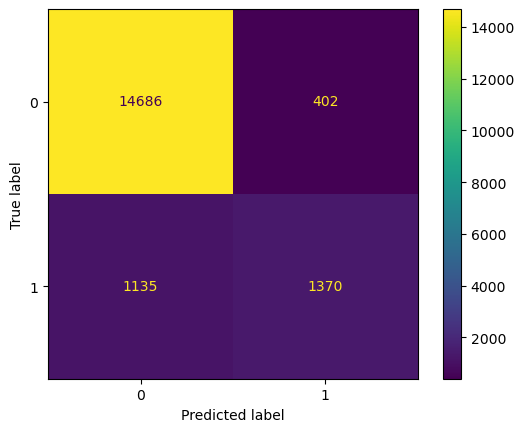

In [27]:
cm= confusion_matrix(y_test, y_pred_scaled, labels = log_reg_scaled.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= log_reg_scaled.classes_)
disp.plot()

In [28]:
 print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_scaled))
 print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_scaled))
 print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_scaled))
 print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_scaled))

Accuracy: 0.912636
Precision: 0.773138
Recall: 0.546906
F1 Score: 0.640636


In [29]:
# Random Forest Model and XGBoost

rf = RandomForestClassifier(random_state = 0)
# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'n_estimators': [75,100,125,150],             
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params,scoring = scoring, refit = 'precision', cv=5)


In [30]:
# %time
#rf_cv.fit(X_train, y_train)

In [31]:
# Pickle the model
#with open('rf_cv_model.pickle', 'wb') as file:
#    pickle.dump(rf_cv, file)

In [32]:
# Read in pickled model
with open('rf_cv_model.pickle', 'rb') as file:
 rf_cv = pickle.load(file)

In [33]:
rf_cv.best_score_

0.9501815170034851

In [35]:
y_pred_rf = rf_cv.best_estimator_.predict(X_test)

In [36]:
 print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_rf))
 print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_rf))
 print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_rf))
 print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_rf))

Accuracy: 0.951742
Precision: 0.921160
Recall: 0.722954
F1 Score: 0.810110


In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.92      0.72      0.81      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593



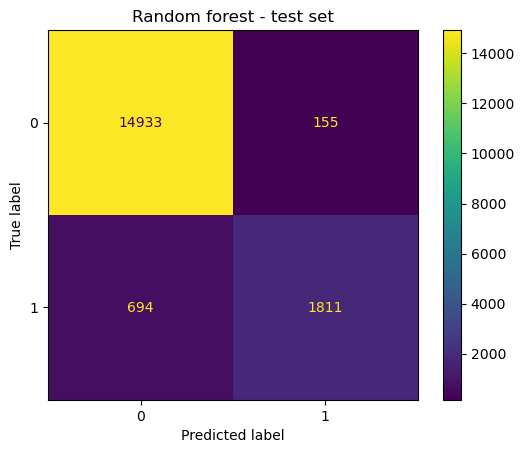

In [38]:
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=None)

# Plot confusion matrix
rf_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

In [39]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [7,8,9,None],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [100,150,175]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=6, refit='f1')

In [40]:
#%time
#xgb_cv.fit(X_train, y_train)

In [41]:
#Pickle the model
#with open('xgb_cv_model.pickle', 'wb') as file:
#    pickle.dump(xgb_cv, file)

In [42]:
# Read in pickled model
with open('xgb_cv_model.pickle', 'rb') as file:
 xgb_cv = pickle.load(file)

In [43]:
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

0.8112010608905319
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 175}


In [44]:
y_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.92      0.73      0.82      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593



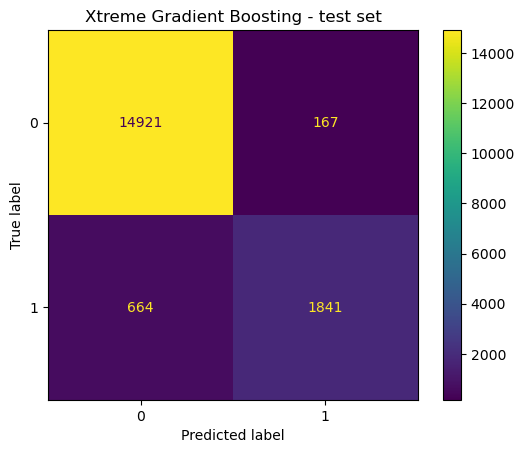

In [46]:
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Create display of confusion matrix
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=None)

# Plot confusion matrix
xgb_disp.plot()

# Display plot
plt.title('Xtreme Gradient Boosting - test set');
plt.show()

In [47]:
#print the metrics scores
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_xgb))
 print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_xgb))
 print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_xgb))
 print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_xgb))

Accuracy: 0.952765
Precision: 0.916833
Recall: 0.734930
F1 Score: 0.815865


From comparing the results of the models, Random Forest model is the one that gives the highest precision score and hence we select RF as the Champion model

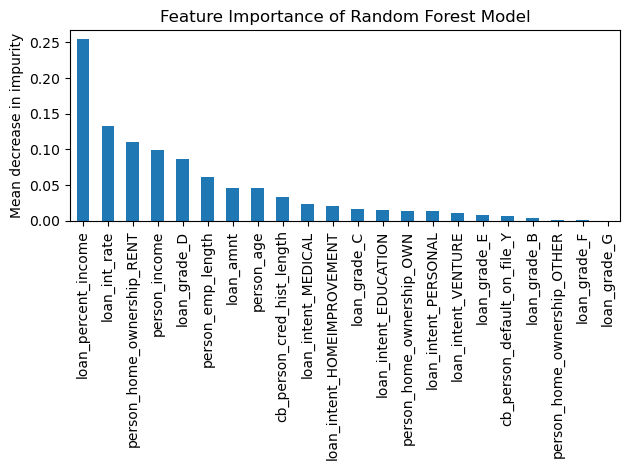

In [62]:
#plotting the feature importance variable to identify the most important features of the Random Forest Model
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index= X_test.columns).sort_values(ascending=False)

fig,ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importance of Random Forest Model')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()